## The positive ring problem

This problem is quite difficult... so it gets its own page. It falls under the theory of numbers 
on the map but it has an element of random chance and choice as well.

Consider a ring of numbers to which we will repeatedly apply a rule. The problem is to show that there 
is an inescapable outcome of this process where the rule can no longer be applied. 

Side note: RK states that this problem was posed in some competition -- maybe a Putnam? -- which implies 
a solution is "available" in the space of a few hours.

Here we go. 

Imagine a ring of $n$ integers chosen randomly such that their sum $s$ is greater than zero.

A *flip* operation $F$ is repeatedly applied to number $v$ chosen at random from among
only those with negative values. (If there are no negative numbers then we are done; $F$ is
not possible.) $F$ works as follows: Reverse the sign of $v$ and subtract the result from
the numbers at the two neighboring vertices $v-1$ and $v+1$. In this way $s$ remains unchanged.

Show that after a finite number of flip operations: no negative integers remain and the process stops.

Abbreviate 'the eventual non-negative state' as $Q$ for
quiescent and $q$ as the number of required flip operations.

The code below creates the ring of numbers and carries out the procedure. $n$ is a variable
and the range of the chosen integers is also controlled by means of $xtreme$. That is, the
integers are on $[-xtreme, xtreme]$. The ring is a list $p[]$. Note that p[0] is adjacent to
p[n-1] because the numbers are in a ring like a necklace.

The **obvious** approach is to define some metric $M$ calculated using the collection of $n$ numbers and show
two things: $M$ is monotonic as a function of iteration $i$ and $M$ is bounded by some limit at $Q$. 
If the monotonic direction is decreasing then presumably $M(Q)$ is initially less than or equal to $M(0)$.
This would solve the problem by the "nowhere to run" principle. However in practice such an $M$
has proven to be non-trivial to design... by this writer anyway.

A cursory examination of some obvious metrics indicates that the general trend such
metrics is monotonic but with superimposed noise: $F$ is not per-iteration monotonic; 
but it is trend-wise monotonic. Some metrics even show a pronounced initial increase before 
settling into a decay pattern.

Reassuring: Q empirically. 

### A mistake in the implementation

I tried for some time to modify $F$ as follows: 

```
choose random vertex at location a with value < 0
at a: Add two
at (a+1): Subtract 1
at (a-1): Subtract 1
```

I subsequently realized that $F$ proper is a more severe version of this. Indeed $F$ 
takes much longer to reach $Q$ than does this variant.

### Notes on how the code runs

The code calculates a p[] list with $s=1$. This is a limiting extreme; other values 
of $s$ would presumably be easier to stabilize to $Q$.

My initial exploration of metrics included individual p[] values, local gradients (RK
makes the point that $F$ is a discrete version of Del-Squared) and distances. The distance
idea asks 'how far around the polygon must I traverse from a negative vertex to find a
compensatory positive balance?' There are a number of ways to do this and only a few were
tried. I wrote the function 'entropy()' to isolate these attempts.

An interesting thing happens (resembling a CA) when only one negative polygon remains.
Suppose for example the sequence is 0 0 0 0 0 0 0 0 0 0 0 0 1 7 -7 0 0 0 0 0 0 0 0 0 0.
Now there is only one vertex to flip and this will create a traveling wave that
continues to the right until it approaches the 1 from the left, whereupon it is
modifed to ...1 6 -6... and so on until only the 1 remains: ...1 0 0...

What is interesting about this is that the individual numerical values across p[] do not
change; only the distribution of values changes. And furthermore the distance from the negative to the
compensatory positives arguably increases before it decreases; there is a barrier on one side
of the negative so the negative *surfs* in the opposite direction. This in turn implies that
while the polygon may be making progress towards Q any hypothetical F-monotonic function
must "see" this progress; and that implies some sophistication.


/home/nbuser/anaconda2_410/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


[-4, -4, 1, 1, -4, 2, 2, 3, -4, 4, 0, 2, 0, 2]
[-8, 4, -3, 1, -4, 2, 2, 3, -4, 4, 0, 2, 0, 2]    4
[-8, 4, -3, 1, -4, 2, 2, -1, 4, 0, 0, 2, 0, 2]    4
[-8, 1, 3, -2, -4, 2, 2, -1, 4, 0, 0, 2, 0, 2]    1
[-8, 1, 3, -2, -4, 2, 1, 1, 3, 0, 0, 2, 0, 2]    1
[-8, 1, 1, 2, -6, 2, 1, 1, 3, 0, 0, 2, 0, 2]    1
[-8, 1, 1, -4, 6, -4, 1, 1, 3, 0, 0, 2, 0, 2]    1
[-8, 1, 1, -4, 2, 4, -3, 1, 3, 0, 0, 2, 0, 2]    1
[8, -7, 1, -4, 2, 4, -3, 1, 3, 0, 0, 2, 0, -6]    -7
[8, -7, -3, 4, -2, 4, -3, 1, 3, 0, 0, 2, 0, -6]    -7
[2, -7, -3, 4, -2, 4, -3, 1, 3, 0, 0, 2, -6, 6]    -7
[2, -7, -3, 4, -2, 4, -3, 1, 3, 0, 0, -4, 6, 0]    -7
[-5, 7, -10, 4, -2, 4, -3, 1, 3, 0, 0, -4, 6, 0]    7
[-5, -3, 10, -6, -2, 4, -3, 1, 3, 0, 0, -4, 6, 0]    -3
[-5, -3, 10, -6, -2, 1, 3, -2, 3, 0, 0, -4, 6, 0]    -3
[-5, -3, 10, -6, -2, 1, 1, 2, 1, 0, 0, -4, 6, 0]    -3
[-5, -3, 4, 6, -8, 1, 1, 2, 1, 0, 0, -4, 6, 0]    -3
[-5, -3, 4, 6, -8, 1, 1, 2, 1, 0, -4, 4, 2, 0]    -3
[5, -8, 4, 6, -8, 1, 1, 2, 1, 0, -4, 4, 2, -5]    -8

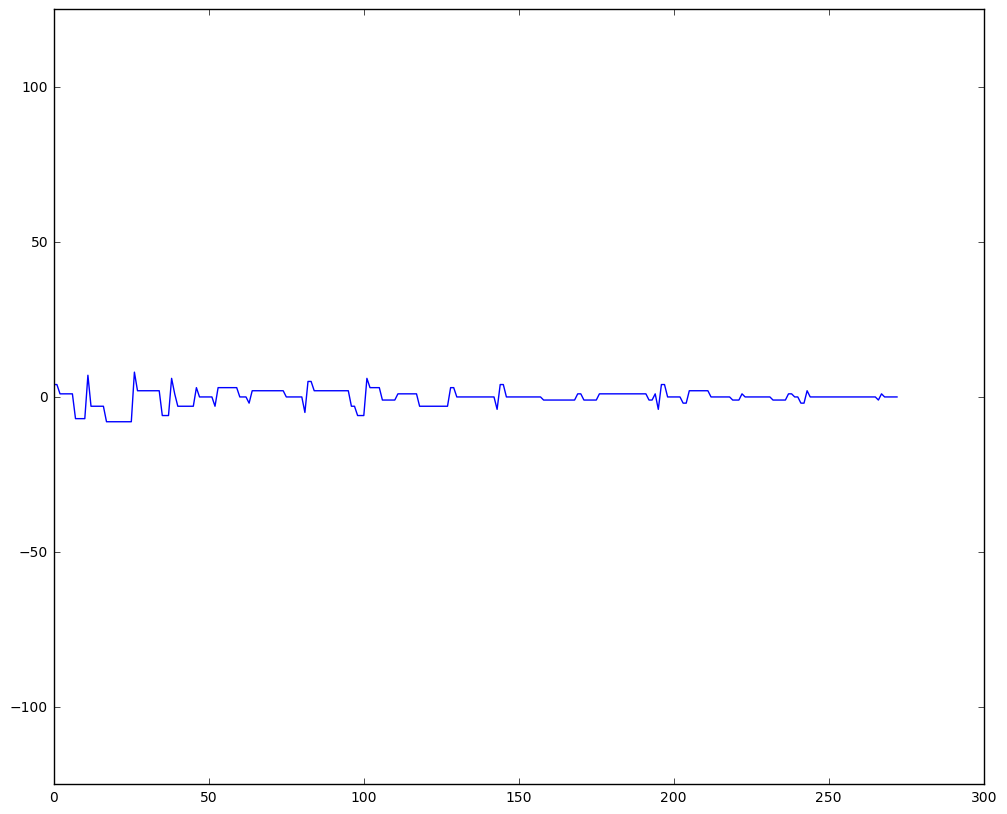

('number of iterations to nothing negative = ', 273)


In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt

xtreme = 4
n = 14
p = []
q = []
for i in range(n):
    p.append(0)
    q.append(0)

def kJustify(i):
    while i < 0: i += n
    while i >= n: i -= n
    return i
        
# go left, go right; add up "something"...
def entropy():
    # product = 1
    distList = []
    for i in range(n):
        distLeft = 0
        distRight = 0
        if p[i] < 0:

            # go left
            sumLeft = p[i]
            for j in range(n-1):
                distLeft = j + 1
                k = i - distLeft
                thisP = p[kJustify(k)]
                sumLeft += thisP
                # until running sum is negative
                if sumLeft >= 0: break

            # go right
            sumRight = p[i]
            for j in range(n-1):
                distRight = j + 1
                k = i + distRight
                thisP = p[kJustify(k)]
                sumRight += thisP
                # until running sum is positive
                if sumRight >= 0: break

            # sumMinDistances += min(distLeft, distRight)
            intermedResult = distLeft + distRight
            distList.append(intermedResult)
    if len(distList) == 0: return 0
    return np.mean(distList)

def entropy1():
    q[:] = p[:]
    return q[1]

def min(a, b):
    if a < b: return a
    return b

def distance(a, b):
    d1 = abs(a - b)
    d2 = abs((a + n) - b)
    d3 = abs((a - n) - b)
    return min(d1, min(d2, d3))

def kDec(k):
    if k == 0: return n-1
    return k - 1

def kInc(k):
    if k == n - 1: return 0
    return k + 1


sum = -1
while sum != 1:
    for i in range(n):
        p[i]=r.randint(-xtreme,xtreme)
    sum = 0
    for i in range(n): sum += p[i]

print(p)

fig, ax = plt.subplots(1, figsize=(12,10))
ax.axis('equal')
# ax[1].axis('equal')
# ax[1].plot(p)

mrec = []
mrec1 = []
ps = []

nTrials = 0
while True:
    neglocs = []
    foundNeg = False
    for i in range(n):
        if p[i] < 0:
            neglocs.append(i)
            foundNeg = True

    if foundNeg == False:
        break

    nTrials += 1
    numNegs = len(neglocs)
    thisIndex = r.randint(0, numNegs - 1)
    k = neglocs[thisIndex]

    # print ('trial', nTrials, 'selected index', k)
    # print (p)

    # here are the correct rules of the game
    ak = p[k]
    p[k] = -ak
    kmo = kDec(k)
    kpo = kInc(k)
    p[kmo] += ak
    p[kpo] += ak

    # here are the epsilon rules
##    ak = p[k]
##    p[k] += 2
##    p[kDec(k)] -= 1
##    p[kInc(k)] -= 1

    # if not nTrials%10: ax[1].plot(p)

    metric = 0
    for i in range(n-1):
        # n = 6: 0 1 2 3 4
        if True:
            for j in range(n - 1 - i):
                # 0 1 2 3 4
                # 0 1 2 3
                # 0 1 2
                # 0 1
                # 0
                i1 = i
                i2 = i + 1 + j
                # 1 2 3 4 5
                # 2 3 4 5
                # 3 4 5
                # 4 5
                # 5
                if True:
                    delta = p[i1]-p[i2]
                    deltaAbs = abs(delta)
                    deltaSqd = delta * delta
                    dist = distance(i1, i2)
                    distSqd = dist * dist
                    # metric += delta * dist
                    metric += deltaAbs * distSqd

    # metric = np.std(p)
    metric = entropy1()
##    metric = 0
    metric1 = 0
    for i in range(n):
##        if p[i] >= 0: metric += p[i]**2
        if p[i] < 0: metric1 += p[i]**2
        # metric += p[i]**2

    print p, '  ', metric
    mrec.append(metric)
    mrec1.append(metric1)
    ps.append(p)

ax.plot(range(nTrials), mrec)
# ax.plot(mrec1)
plt.show()
# plt.plot(ps[0])
# plt.plot(ps[1])
# plt.plot(mrec)
# plt.show()

print ('number of iterations to nothing negative = ', nTrials)